In [158]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = np.array([1,3,4,6],dtype = float).reshape(2,2)
b = np.array([1,0],dtype = float)

print(a)
print(b)

[[ 1.  3.]
 [ 4.  6.]]
[ 1.  0.]


In [3]:
np.square(a)


array([[  1.,   9.],
       [ 16.,  36.]])

In [4]:
matrix = np.mat("1 2 3; 4 5 6; 7 8 9")

In [5]:
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [14]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [17]:
print (a+b)

[  4.   9.  12.  15.]


In [18]:
print(a*b)

[  3.  18.  32.  54.]


In [19]:
print(a/b)

[ 0.33333333  0.5         0.5         0.66666667]


In [20]:
print(a%b)

[ 1.  3.  4.  6.]


In [21]:
a%b

array([ 1.,  3.,  4.,  6.])

In [76]:
from numpy import genfromtxt
my_data = genfromtxt('/Users/hhundiwala/Downloads/dataset_1.csv', delimiter=',')

In [6]:
my_data.shape


(1001, 3)

In [78]:
my_clean_data = my_data[2:1001,2]

In [234]:
my_clean_data

array([[ 0.084,  0.803,  0.524],
       [ 0.311,  1.644,  0.532],
       [ 0.549,  2.553,  0.062],
       ..., 
       [ 0.622,  2.858,  0.852],
       [ 0.02 , -0.319,  0.144],
       [ 0.76 ,  4.012,  0.353]])

Question 1.c

In [187]:
def my_PCA(input):
    #calculating mean of each column
    mean = np.mean(input,0)
    #subtracting the mean from original input matrix
    normalised_input = np.subtract(input,mean)
    #Taking transpose of the normalised matrix
    normalised_input_transpose = np.transpose(normalised_input)
    #calculating number of samples
    num_of_samples = input.shape[0]
    #multiplying the matrices and dividing it by "num of samples" to get the covarience
    cov_mat = (np.dot(normalised_input_transpose,normalised_input))/(num_of_samples)
    print("Covarience Matrix")
    print(cov_mat)
    
    #finding eigenvalues and eigenvectors
    value,vector = np.linalg.eig(np.array(cov_mat))
    print("Eigen Value")
    print(value)
    print("EigenVector")
    print(vector)
    size = vector.shape
    print(size)
    #finding position of maximum eigenvalue
    max_value_one_pos = np.argmax(value)
    #fetching the corroesponding eigenvector
    eigen_vec_one = (vector[:,max_value_one_pos])
    
    #deleting max value so that we can find second largest
    new_value = np.delete(value,max_value_one_pos)
    #deleting corroesponding max eigenvector
    new_vector = np.delete(vector,max_value_one_pos,1)
    print("PC1")
    print(eigen_vec_one)
    
    
    #finding position of second highest eigenvalue
    max_value_two_pos = np.argmax(new_value)
    #fetching the corroesponding eigenvector
    eigen_vec_two = (new_vector[:,max_value_two_pos])
    print("PC2")
    print(eigen_vec_two)
    
    prin_component = np.column_stack((eigen_vec_one,eigen_vec_two))
    
    print("Principal Components")
    print(prin_component)
    
    
    #multiplying principal component matrix with input to get pca
    pca_output = np.dot(normalised_input,prin_component)

    return pca_output

    

In [188]:
op = my_PCA(my_clean_data)

Covarience Matrix
[[ 0.08052931  0.40202635 -0.00250789]
 [ 0.40202635  2.09690259 -0.01438026]
 [-0.00250789 -0.01438026  0.08050195]]
Eigen Value
[ 2.17420495  0.00332789  0.08040102]
EigenVector
[[ 0.18857784  0.982048    0.00448705]
 [ 0.98203351 -0.18860355  0.00623651]
 [-0.00697082 -0.00323037  0.99997049]]
(3, 3)
PC1
[ 0.18857784  0.98203351 -0.00697082]
PC2
[ 0.00448705  0.00623651  0.99997049]
Principal Components
[[ 0.18857784  0.00448705]
 [ 0.98203351  0.00623651]
 [-0.00697082  0.99997049]]


In [227]:
def my_cov(input):
    #calculating mean of each column
    mean = np.mean(input,0)
    #subtracting the mean from original input matrix
    normalised_input = np.subtract(input,mean)
    #Taking transpose of the normalised matrix
    normalised_input_transpose = np.transpose(normalised_input)
    #calculating number of samples
    num_of_samples = input.shape[0]
    #multiplying the matrices and dividing it by "num of samples" to get the covarience
    return (np.dot(normalised_input_transpose,normalised_input))/(num_of_samples)
    

Visualising the Dataset before and after PCA
    
    

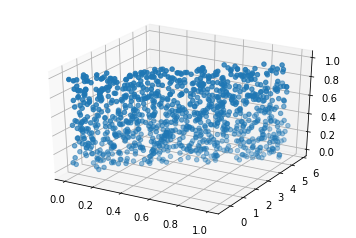

In [195]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection="3d")
ax.scatter(my_clean_data[:,0],my_clean_data[:,1],my_clean_data[:,2])
plt.show()

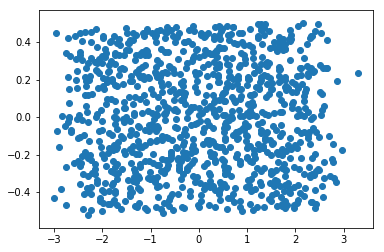

In [199]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(op[:,0],op[:,1])
plt.show()

Question 1.a --  Calculating Varience

In [202]:
my_clean_data.shape

(1000, 3)

In [218]:
mean_matrix = np.mean(np.mat(my_clean_data),0)
var_of_xyz = np.mean(np.square(np.subtract(my_clean_data,mean_matrix)),0)

In [217]:
var_of_xyz

array([[ 0.08052931,  2.09690259,  0.08050195]])

Varience of input dataset is:

x ->0.08052931
y ->2.09690259
z ->0.08050195

Question 1.b -- Calculating Covarience

In [233]:
cov = my_cov(my_clean_data)

In [223]:
Covarience_X_and_Y = cov[0][1]

In [224]:
Covarience_X_and_Y

0.40202634771400003

In [230]:
Covarience_Y_and_Z = cov[1][2]

In [231]:
Covarience_Y_and_Z

-0.014380262649000006

#Thus Covarience between X and Y, and between Y and Z are as follows, ----------
Covarience_X_and_Y  = 0.40202634771400003,  
Covarience_Y_and_Z  = -0.014380262649000006

In [243]:
def digonalisation(input):
    #check if matrix is square
    shape = input.shape
    if(shape[0]!=shape[1]):
        return "Matrix is not diagonalizable"
    value, vector = np.linalg.eig(input)
    
    #check if two eigenvalues are same or not
    check_value = np.unique(value)
    if(check_value.size != value.size):
        return "Matrix is not diagonalizable"
    
    #if eigen values determinant is zero
    if(np.linalg.det(vector)==0):
        return "Matrix is not diagonalizable"
    
    vector_inverse = np.linalg.inv(vector)
    D = np.eye(value.size)*(value.reshape(value.size,1))
    
    
    print(np.dot(np.dot(vector,D),vector_inverse))
    print(input)

#Question 3.b


In [246]:
value, vector = np.linalg.eig(np.array([0,-1,2,3]).reshape(2,2))

In [247]:
value

array([ 1.,  2.])

In [248]:
vector

array([[-0.70710678,  0.4472136 ],
       [ 0.70710678, -0.89442719]])

The output by linalg.eig is not exactly same as of manual calculation, but it is logically correct.

I got the equation for first eigen vector as v1 = -v2.

This is satisfied by linalg.eig...I did it using value 1

Equation for second eigen vector as v1 = -v2/2

It is also logically correct